<a href="https://colab.research.google.com/github/jjkcoding/CNN-Prediction-Model-on-AAPL-Stock-Prices/blob/main/CNN_Prediction_Model_on_AAPL_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network with AAPL Stock Prices

## Description:
Because I have recently been interested in stocks and neural networks, I wanted to try creating a univariate neural network using a Convolutional Neural Network. More specifically, I would use two month (60 days) of closing AAPL price stock data as an input to attempt to predict the next day's closing AAPL stock price data. Because stocks are unpredictable by only looking at the stock data alone, this project was to learn more about creating Convolutional Neural Networks and how they work rather than actually creating a model to predict AAPL stock prices. 

In [1]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error
from keras.callbacks import History
import math
import yfinance as yf

Import AAPL closing stock price data from yahoo finance

In [2]:
apl = yf.Ticker("aapl").history(period='max', interval='1d')
apl.reset_index(inplace=True)
close_apl = apl.Close.values

Splitting the data into increments of 60 days for convolutional neural network model

In [3]:
X = []
y = []
inp_num = 60

for i in range(inp_num, len(close_apl)):
    X.append(close_apl[i-inp_num:i])
    y.append(close_apl[i])

X = np.array(X)
y = np.array(y)

Splitting the dataset into trianing and testing data (80% training data, 20% testing data)

In [4]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = np.array(y[:split])
X_test = X[split:]
y_test = np.array(y[split:])

Standardizing and reshaping the data to fit neural network

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Creating Convolutional Neural Network Model

In [6]:
model = Sequential() 
model.add(Conv1D(filters=60, kernel_size=3, activation = "relu", input_shape=(inp_num, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

Training model to the training dataset

In [7]:
hist = History() # Used to record loss per epoch
model.fit(X_train, y_train, epochs=200, batch_size = 32, callbacks=[hist])

Epoch 1/200
258/258 [==============================] - 2s 6ms/step - loss: 0.7730
Epoch 2/200
258/258 [==============================] - 2s 8ms/step - loss: 0.1208
Epoch 3/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0663
Epoch 4/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0571
Epoch 5/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0629
Epoch 6/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0479
Epoch 7/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0472
Epoch 8/200
258/258 [==============================] - 2s 7ms/step - loss: 0.0705
Epoch 9/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0308
Epoch 10/200
258/258 [==============================] - 2s 7ms/step - loss: 0.0391
Epoch 11/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0340
Epoch 12/200
258/258 [==============================] - 2s 8ms/step - loss: 0.0296
Epoch 13/200


Plotting losses by epoch to see roughly where the losses start to converge towards

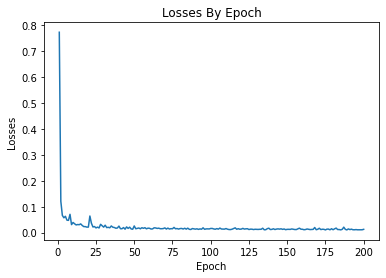

In [8]:
losses = hist.history['loss']
plt.plot(np.arange(1, len(losses) + 1),losses)
plt.title("Losses By Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()

Predict values of the testing dataset

In [9]:
yhat = model.predict(X_test)
yhat = yhat.reshape(yhat.shape[0],)

Calculate Root Mean Square Error to compare predicted values to actual values

In [10]:
mse = math.sqrt(mean_squared_error(y_test, yhat))
print("RMSE = " + str(mse))

RMSE = 1.6669066176404288


Plot and Compare closing stock predicted and actual stock prices

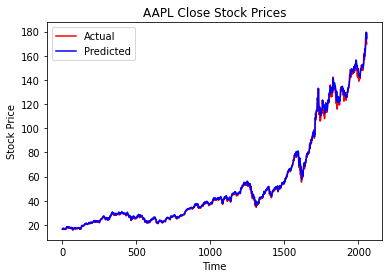

In [11]:
plt.plot(y_test, color="red", label="Actual")
plt.plot(yhat, color = "blue", label = "Predicted")
plt.title("AAPL Close Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

Predicting the next day AAPL stock closing price

In [12]:
last_vals = close_apl[len(close_apl) - inp_num:len(close_apl)]
last_vals = sc.transform(np.reshape(last_vals, (1, last_vals.shape[0])))
pred_vals = model.predict(last_vals)[0]
print("Next day predicted closing price: " + str(pred_vals[0]))

Next day predicted closing price: 174.40346


Plotting last 50 days with the latest predicted value above

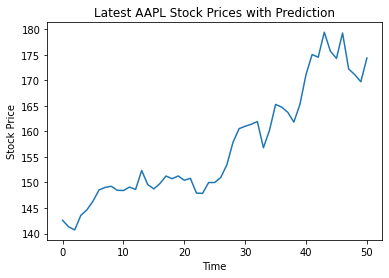

In [14]:
prev_val = 50
latest_close = np.concatenate((close_apl[len(close_apl) - prev_val:], pred_vals))

plt.plot(latest_close)
plt.title("Latest AAPL Stock Prices with Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()